# E-retail Factors for Customer Activation and Retention

### Problem Statement:
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

### Business Goal:
Data Scientists have to apply their analytical skills to give findings and conclusions in detail.

In [45]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import scipy.stats as stats
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) # To display all the columns

In [2]:
# Loading the dataset
df=pd.read_excel('customer_retention_dataset.xlsx')

In [3]:
#cheking shape of the dataset
df.shape

(269, 71)

We have 269 rows and 71 columns

In [4]:
#Lets take a look at our dataset
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [5]:
#Checking information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [6]:
# Except pincode column all other columns are of object type.

In [7]:
#Checking for null values
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

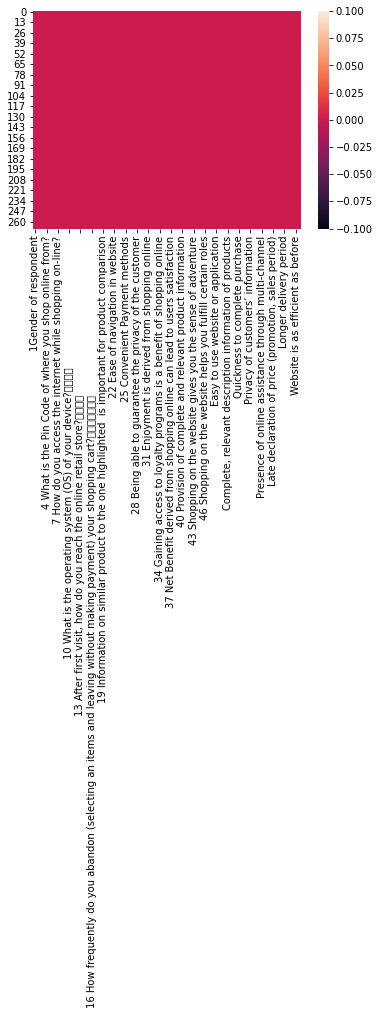

In [8]:
sns.heatmap(df.isnull())

In [9]:
#There are no null values in our dataset

### Dividing the dataset into three groups:

As the dataset is large, therfore we will be diving the dataset into three categories. So that it will become easier to visualise them.

1. Categorical_columns => This will contain demographic features and other person specific features like age, gender, browser.
2. Rating_columns => This will contain all questions which have answers in the form of rating like (Agree, Strongly Agree, Indifferent etc.)
3. Ecommerce_columns => This will contain all questions which have answers in the form of ecommerce company (amazon, flipkart, myntra etc.)



In [10]:
# categorical_columns can be located from column index 0 to 16
categorical_columns=df.iloc[:,:17].columns
categorical_columns=categorical_columns.to_list()

# rating_columns can be located from column index 17 to 46
rating_columns=df.iloc[:,17:47].columns
rating_columns=rating_columns.to_list()

# ecommerce_columns can be located from column index 47 and above
ecommerce_columns=df.iloc[:,47:].columns
ecommerce_columns=ecommerce_columns.to_list()

# Visualization

In [11]:
#Visualizing categorical columns

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


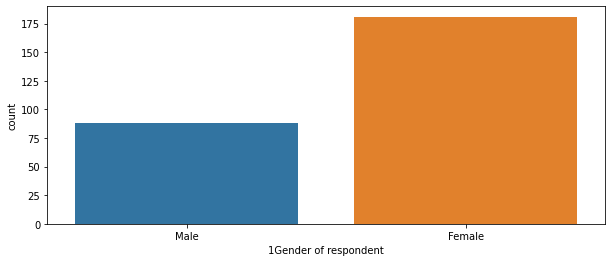




31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


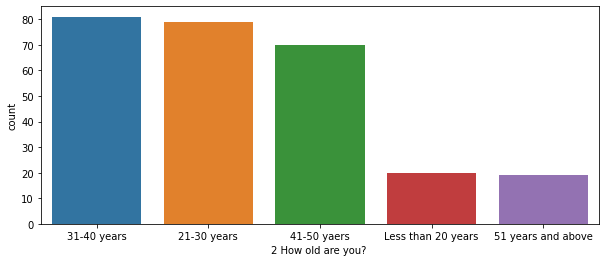




Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


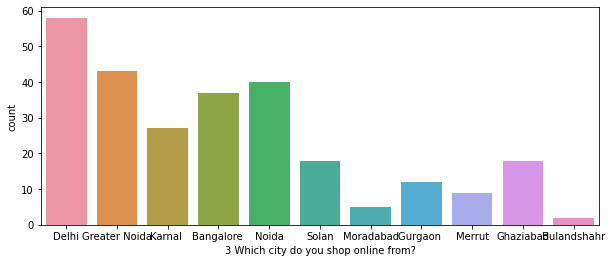




Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64


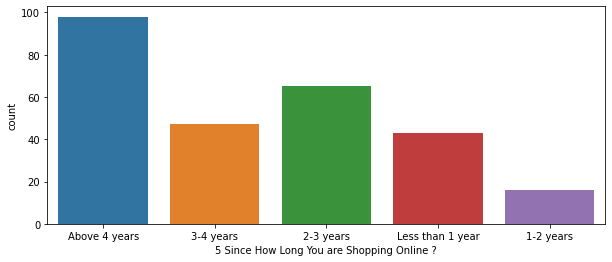




Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64


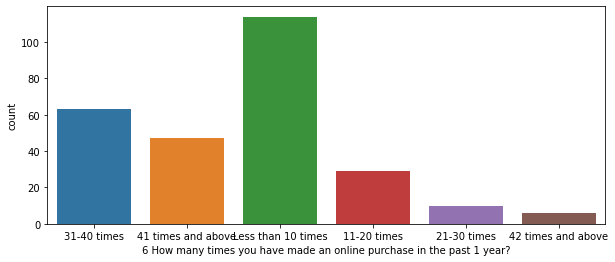




Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


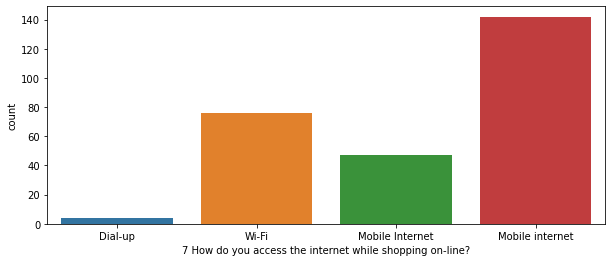




Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64


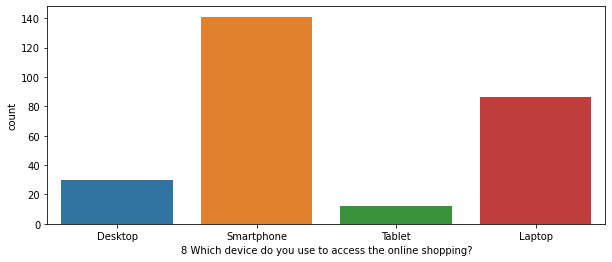




Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64


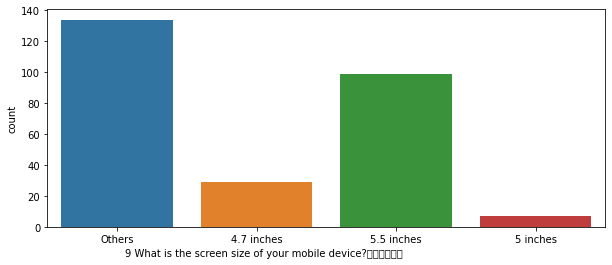




Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


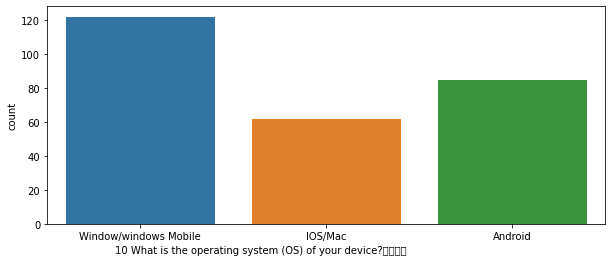




Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


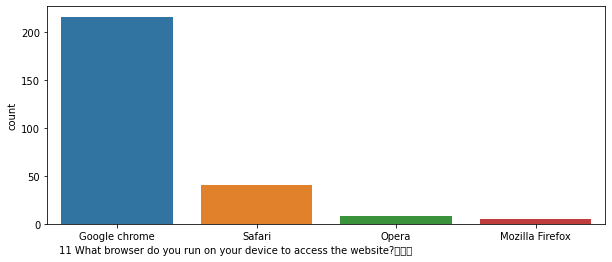




Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64


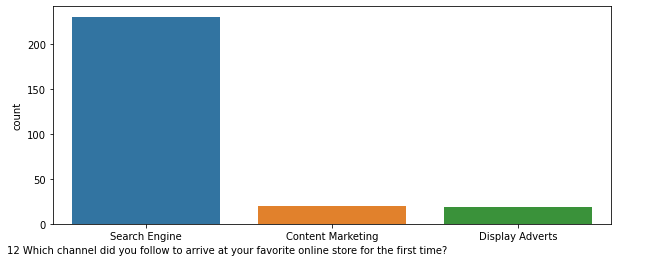




Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


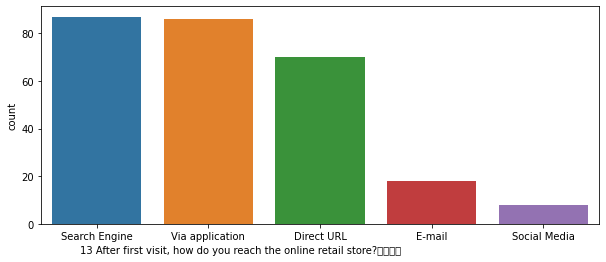




more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64


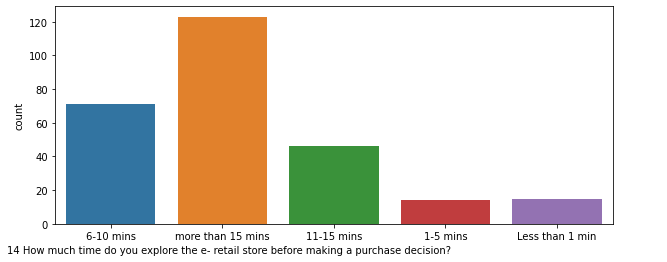




Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


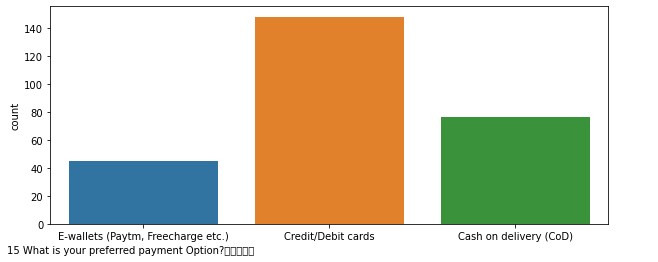




Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


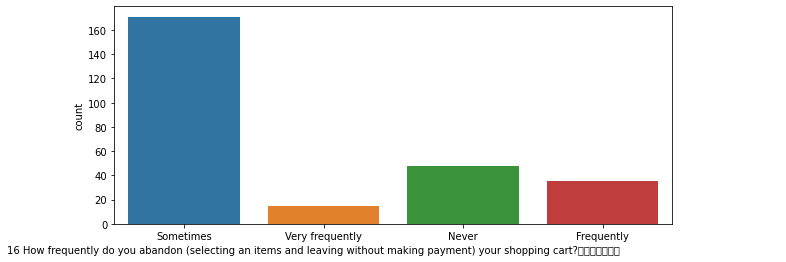




Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


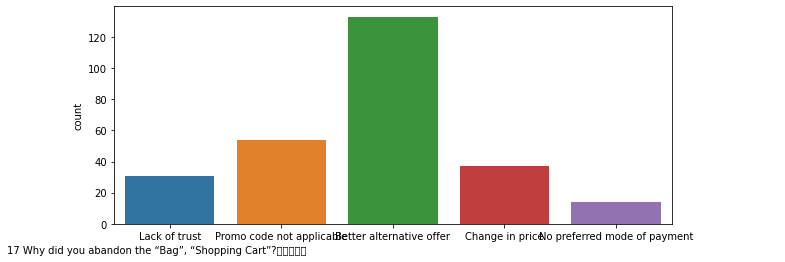

In [14]:
for col in categorical_columns:
    if col!='4 What is the Pin Code of where you shop online from?':# we will plot the pincodes afterwards
        print(df[col].value_counts())
        plt.figure(figsize=(10,4))
        sns.countplot(x=df[col])
        plt.show()       
        print('\n\n')

### Observation:
1. There are around 50% more female customers as compared to male.
2. 85% of the people are within age group 20-50 years. Very small percentage of people are less than 20 or more than 50 years old.
3. Delhi, Greater Noida, Noida and Bangalore have the maximum participants.
4. Maximum number of participants have been using Online Shopping platforms for more than 4 years.
5. Purchases in last 1 year: Maximum People have made purchases less than 10 times. Next in line are 30-40 and 40+
6. Most people use Mobile internet during shopping on-line.
7. Very few people use desktops or tablets; while most are using Smartphones and laptops.
8. A large percentage of people use Google Chrome.
9. Search Engines are the most used channel which guide people to their favorite online store.
10. Most people take purchase decision after spending more than 15 minutes.
11. Credit/Debit cards are the most used mode of payment.
12. Maximum people abandon the items in cart 'sometimes' as opposed to never or frequently.
13. The biggest reason to abandon is 'Better alternative offer.

201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64


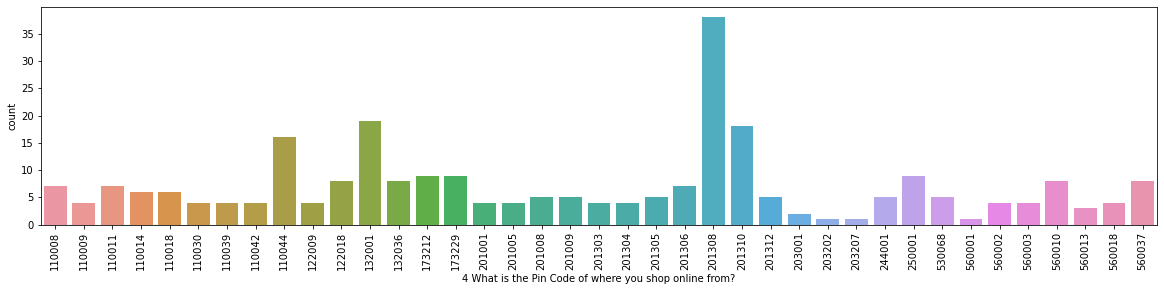

In [16]:
#Let's see the counts for pin codes
print(df['4 What is the Pin Code of where you shop online from?'].value_counts())
plt.figure(figsize=(20,4))
sns.countplot(x=df['4 What is the Pin Code of where you shop online from?'])
plt.xticks(rotation=90)
plt.show()

### Observation:
=> Pin Code 201308: Has the Most Number of buyers, closely Followed by 132001, 201310 and 110044.

=> 201308 and 201310 belongs to Gr.Noida,Gautam Buddha Nagar.

=> 132001 belongs to Karnal, Haryana

=> 110044 belongs to Badarpur, South Delhi

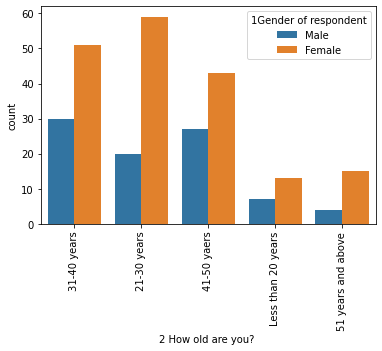

In [18]:
# Visualizing Age with Gender

sns.countplot(x=df['2 How old are you? '],hue = df['1Gender of respondent'])
plt.xticks(rotation=90)
plt.show()

### Observation:
Majority of customers are Female from the age group of 21-30 years.

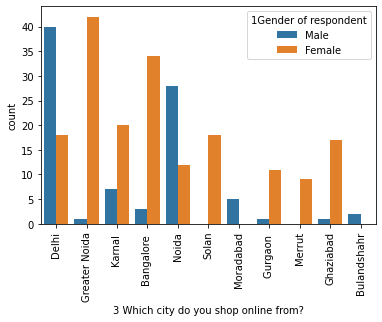

In [19]:
## Visualizing City with Gender
sns.countplot(x=df['3 Which city do you shop online from?'],hue=df['1Gender of respondent'])
plt.xticks(rotation=90)
plt.show()

### Observation:
In Delhi, Noida, Moradabad and Bulandshahr there are more male shoppers than females.

In [21]:
#Visualizing rating based parameteres
# we will use coded dataset here
df_coded= pd.read_excel("codedsheet.xlsx")

In [25]:
dict = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'} 

df_likert=df_coded.copy()
# Remapping the values of the dataframe 
for col in rating_columns:
    df_likert.replace({col: dict},inplace=True)

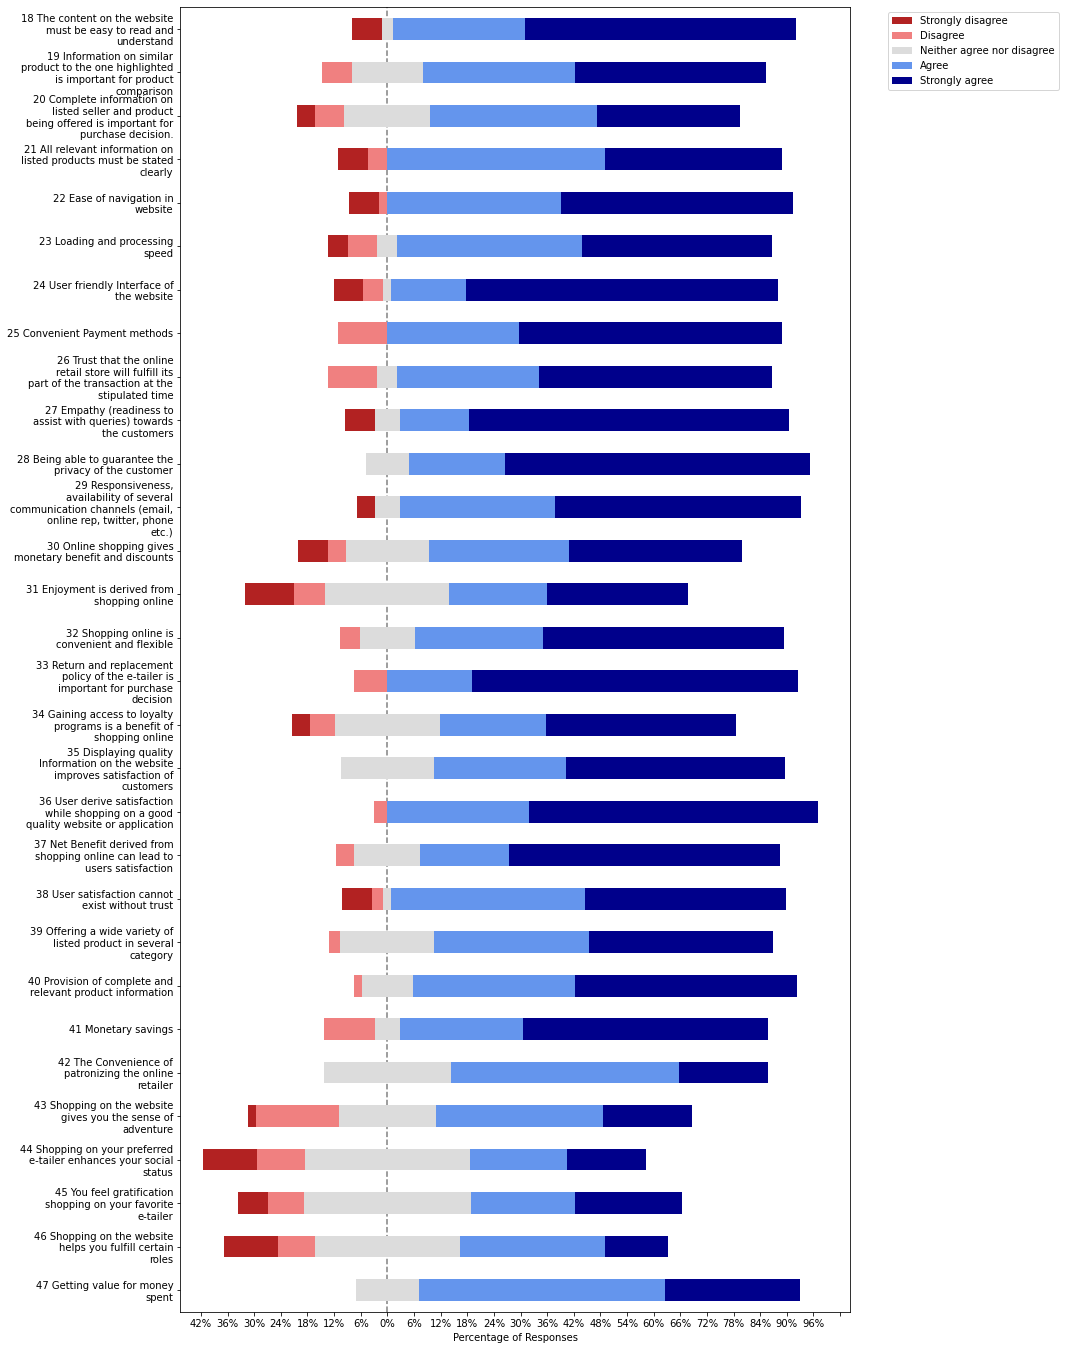

In [28]:
plot_likert.plot_likert(df_likert[rating_columns], plot_likert.scales.agree, plot_percentage=True,figsize=(12,24))
plt.show()

### Observation:
1. A large majority of people believe that content on the website must be easy to read and understand.
2. People agree that Information on similar product to the one highlighted is important.
3. 70% people believe that Complete information on listed seller and product is important for purchase decision.
4. 90% people believe that All relevant information on listed products must be stated clearly.
5. For more than 90% people, ease of navigation of website, loading or processing speed as well as User friendly Interface of the website is important.
6. Other important parameters are - Convenient Payment Methods, privacy of customers, responsiveness, availability of several Communication channels, return and replacement policy.
7. Around 80% people believes that Displaying quality Information on the website improves satisfaction of customers.
8. Almost all participants believe that User derive satisfaction while shopping on a good quality website or application.
9. Very high percentage of people believe that Net Benefit derived from shopping online can lead to users satisfaction.
10. Most People believe that User satisfaction cannot exist without trust.

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64


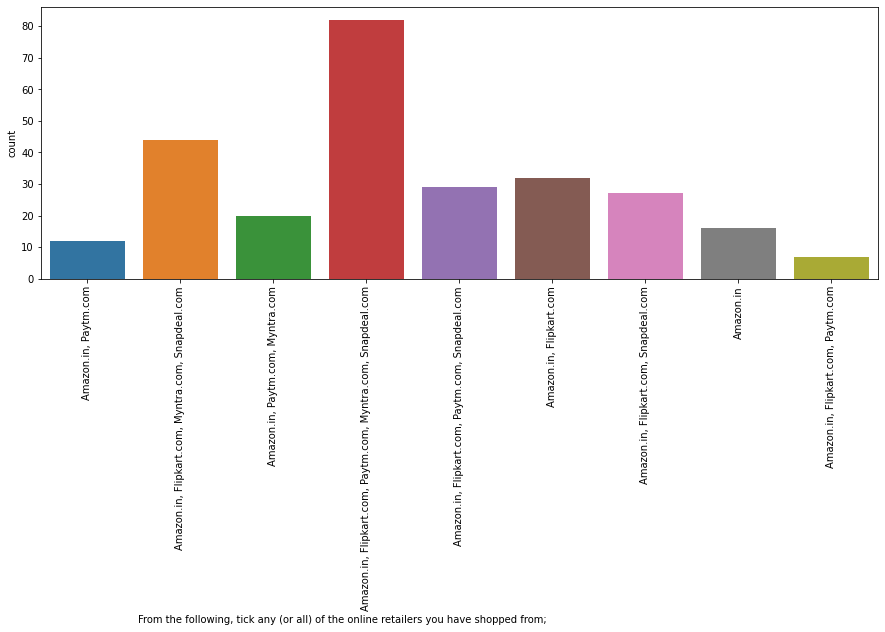




Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


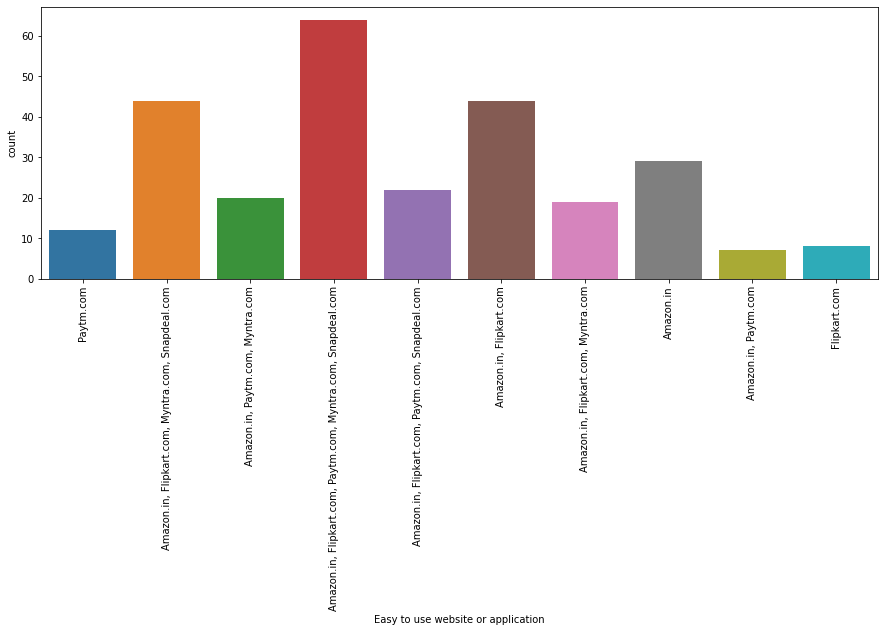




Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


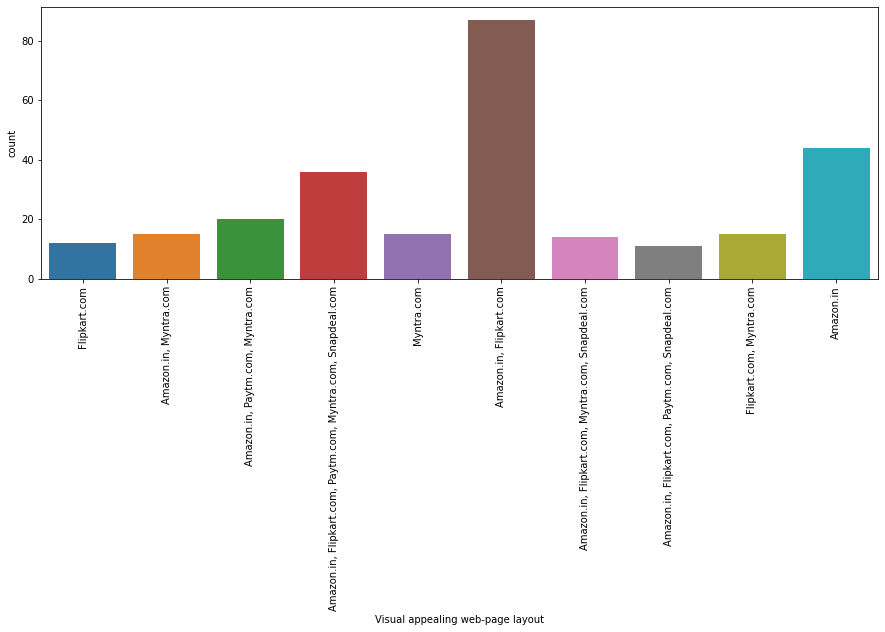




Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


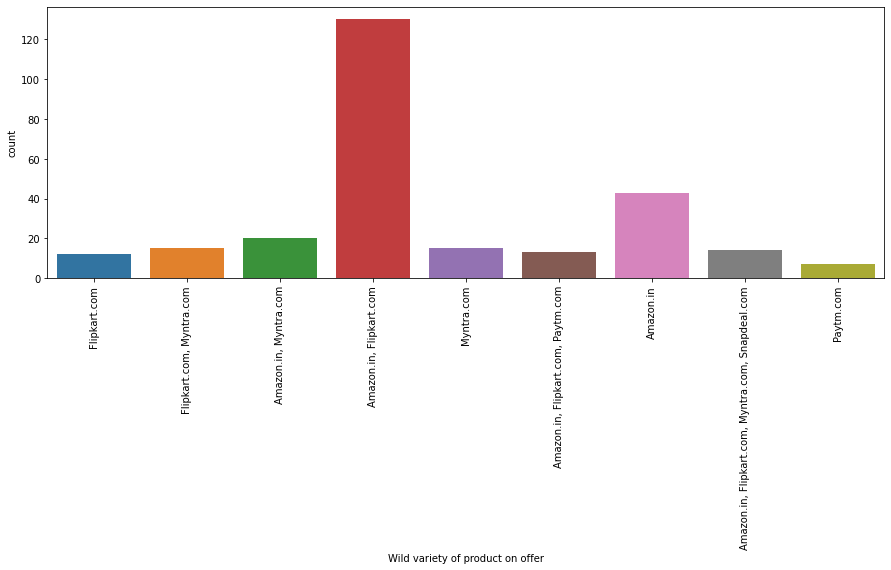




Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


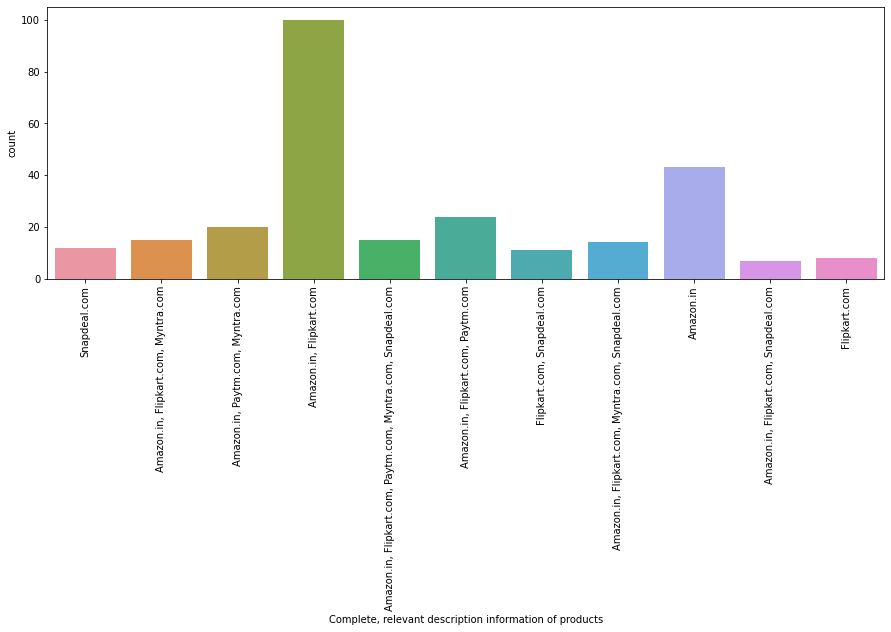




Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


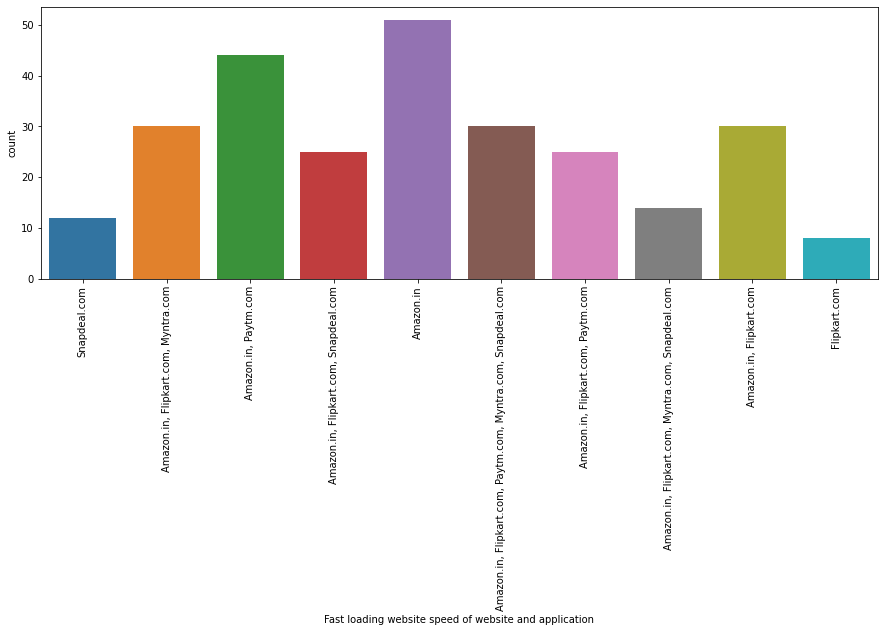




Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


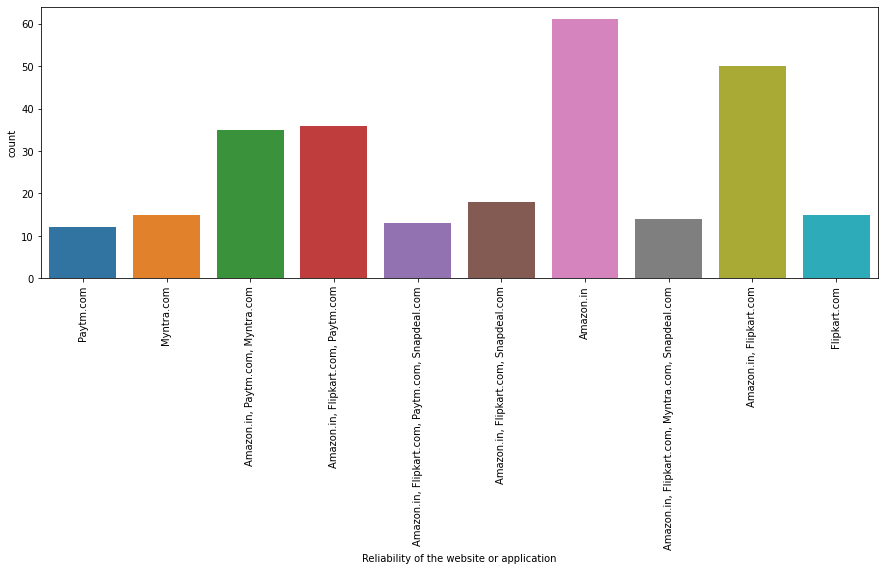




Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


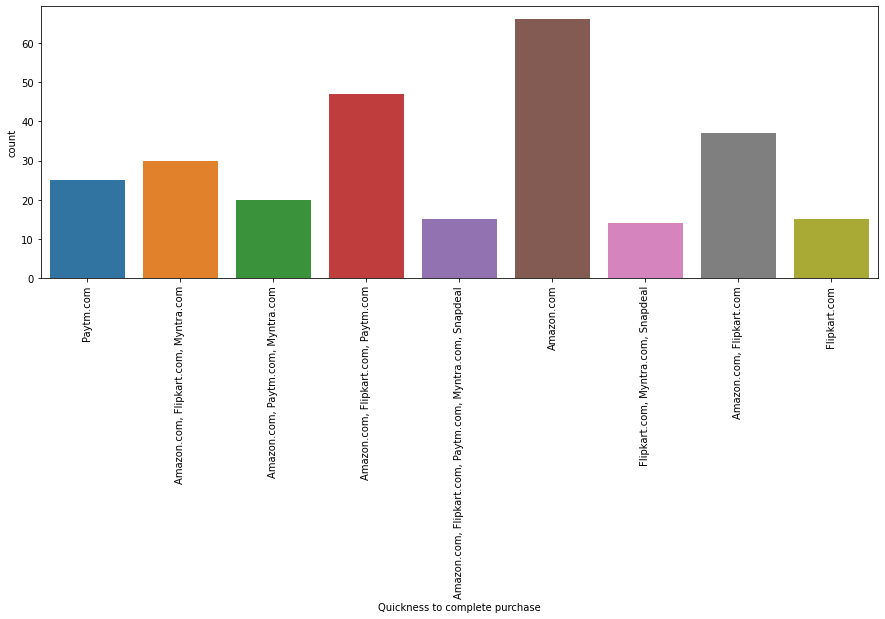




Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


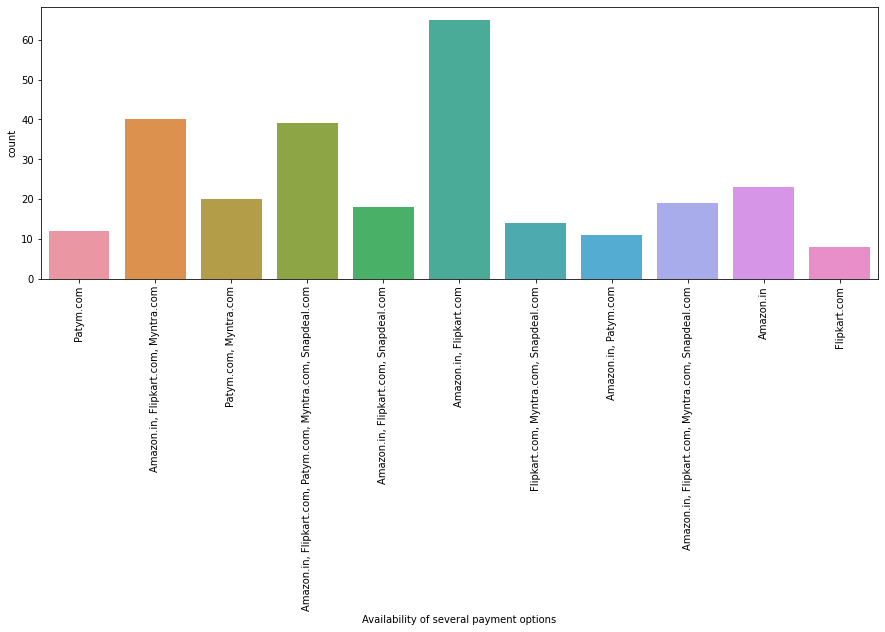




Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


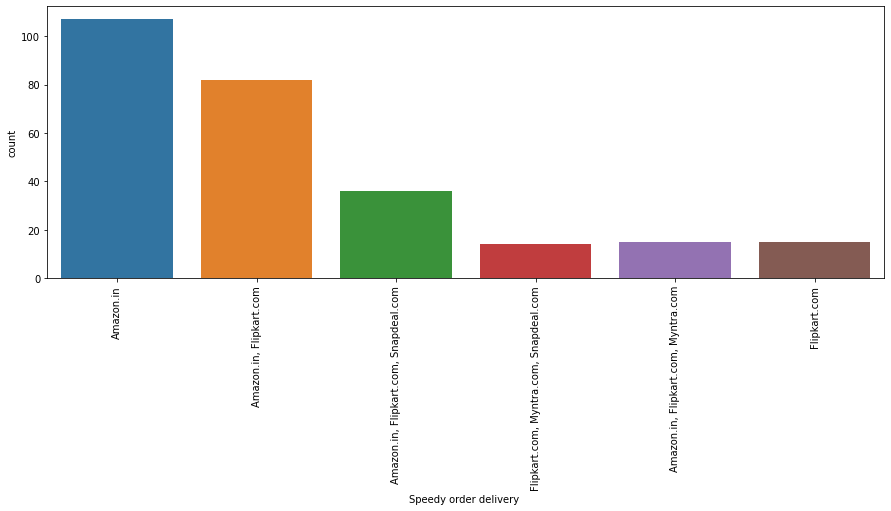




Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


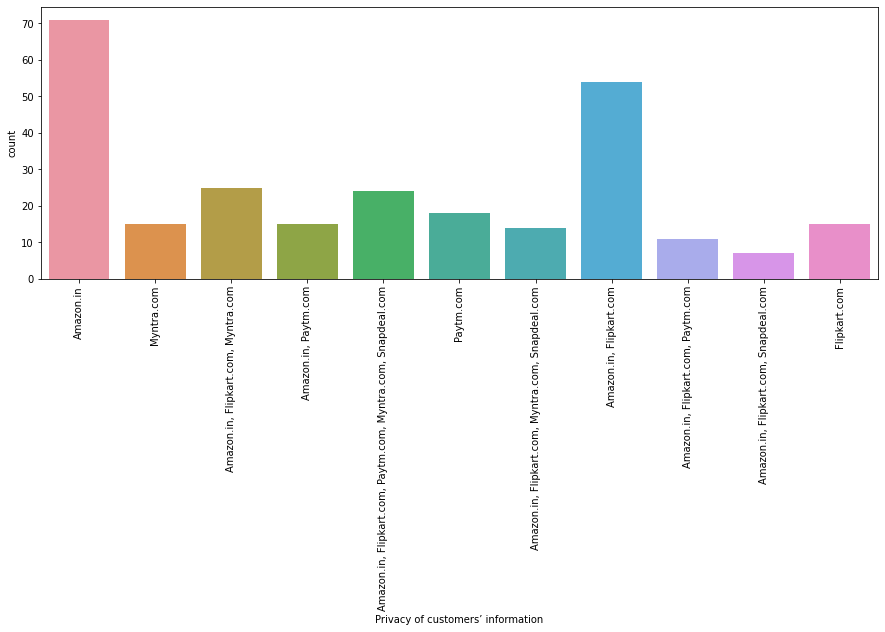




Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


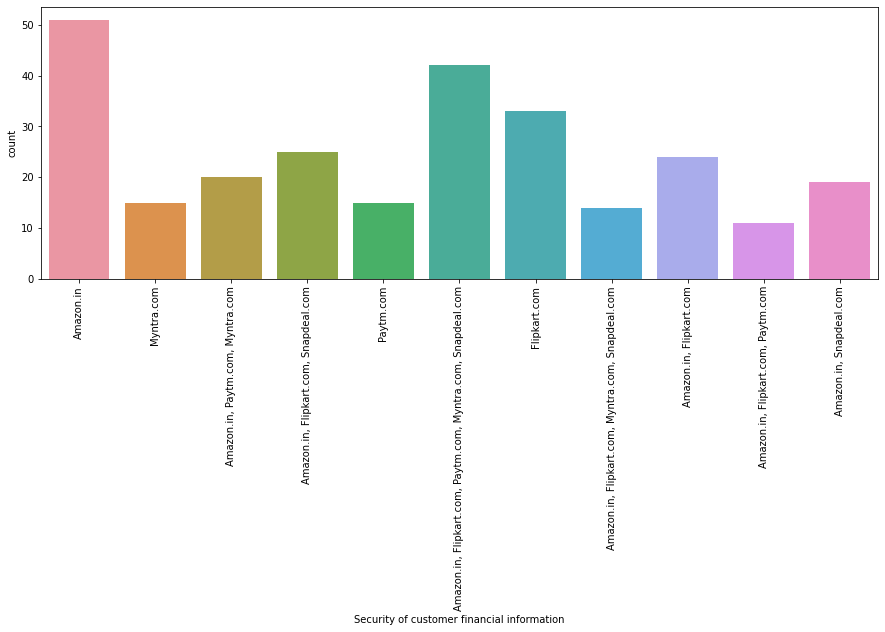




Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


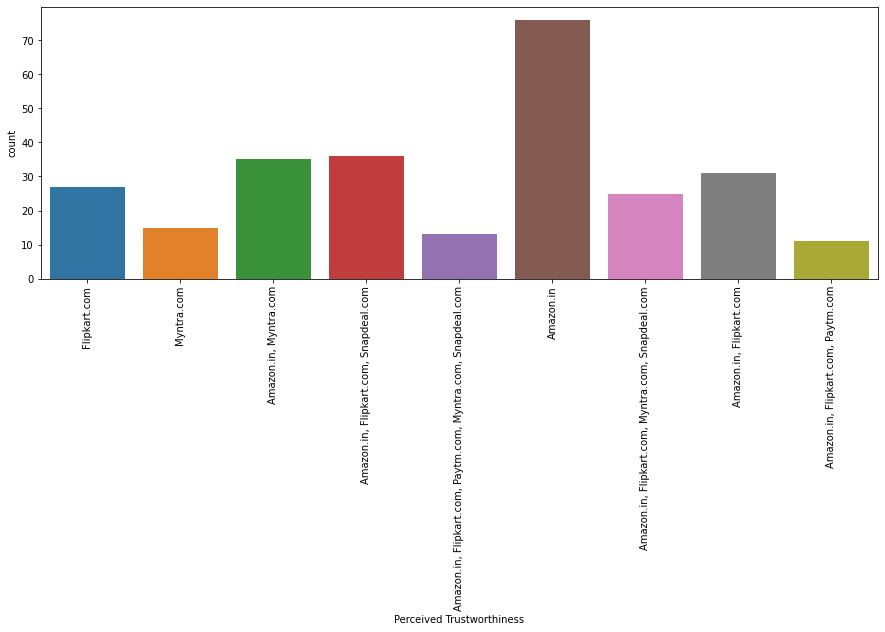




Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


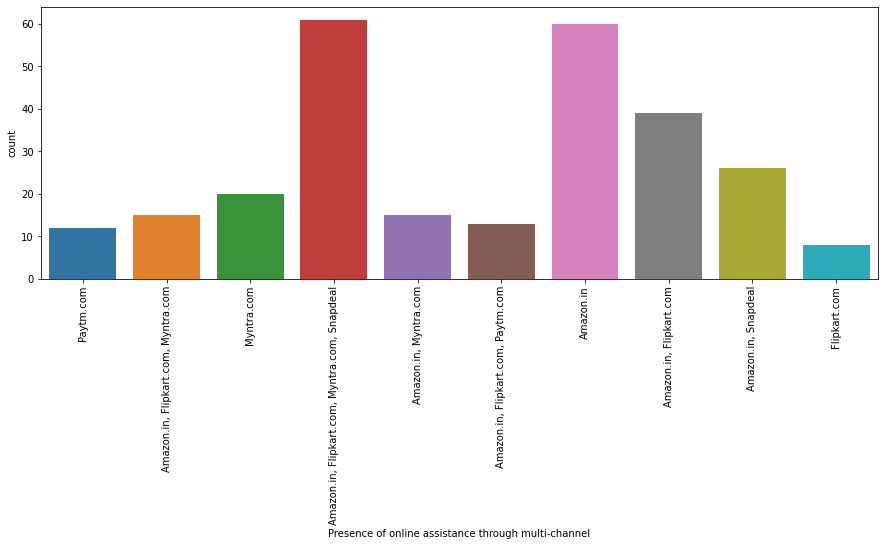




Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


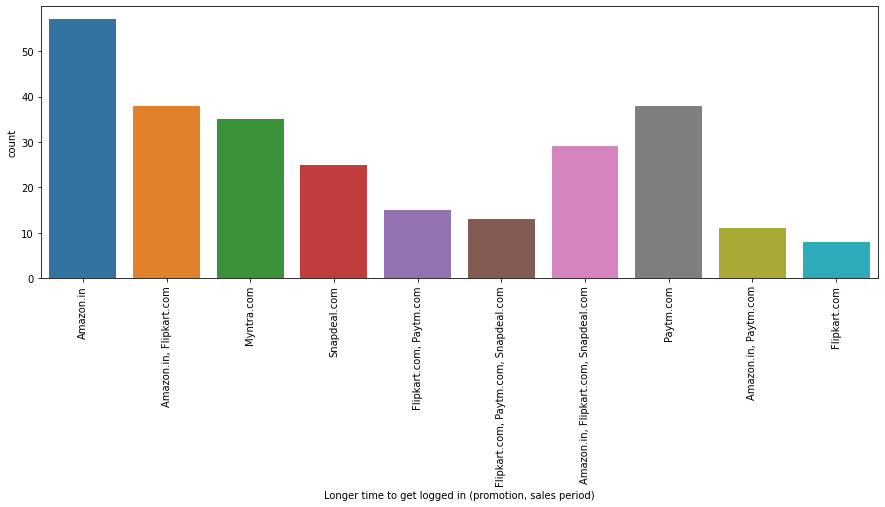




Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


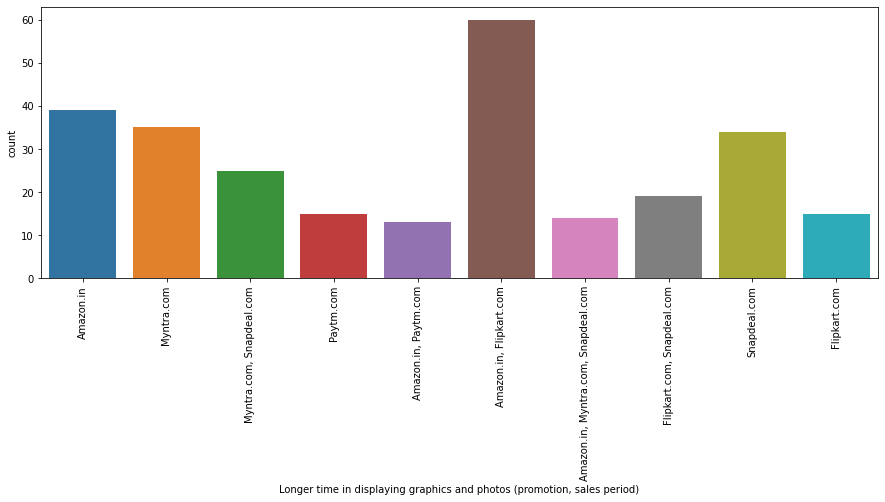




Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


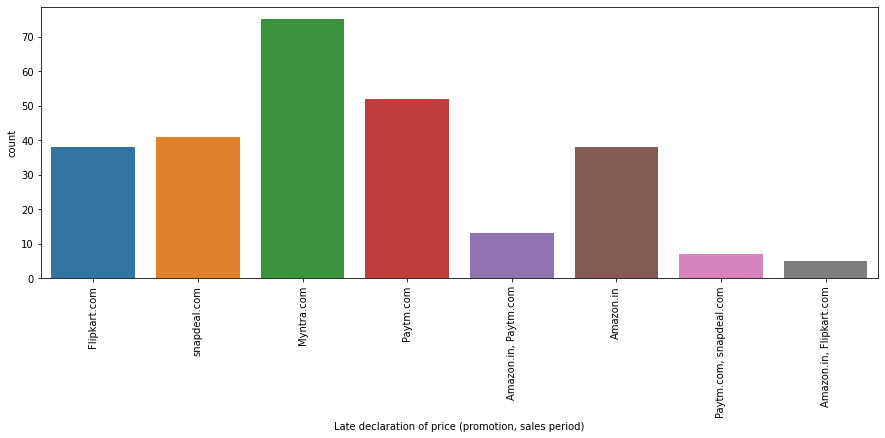




Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


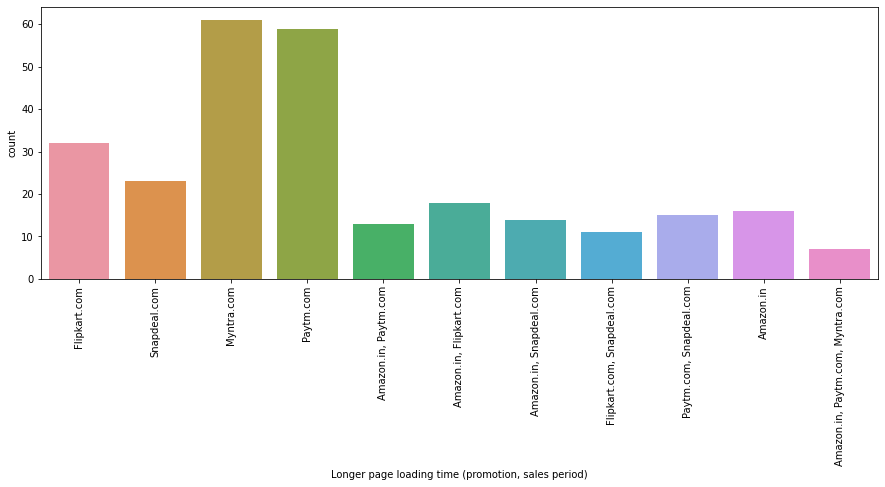




Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


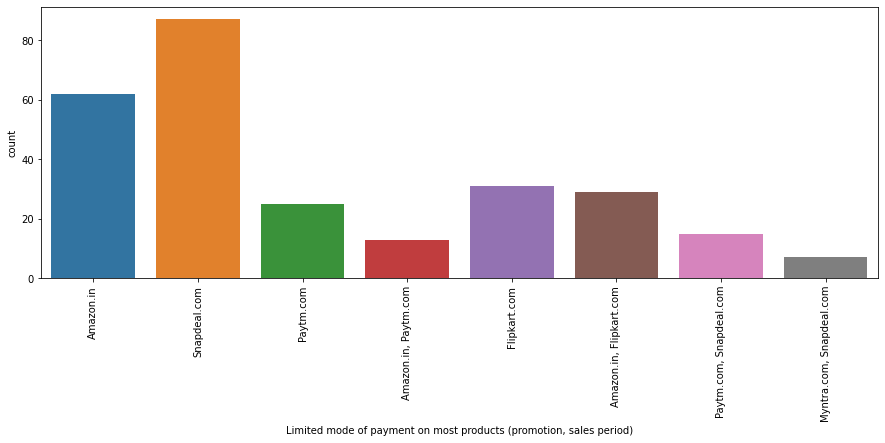




Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


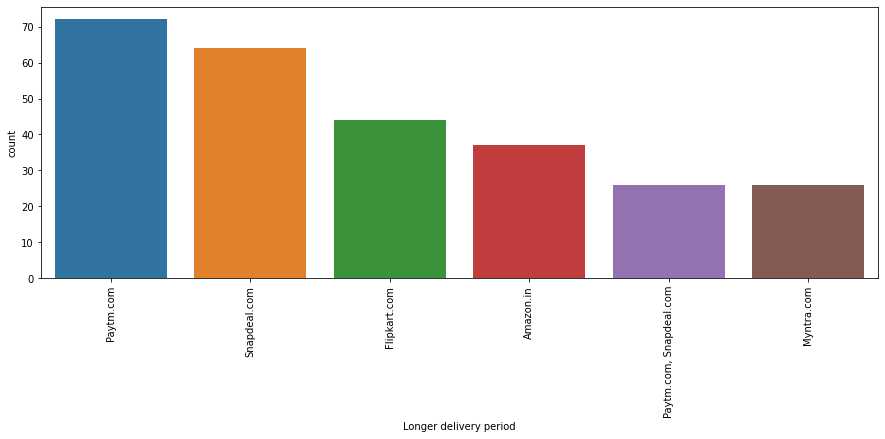




Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


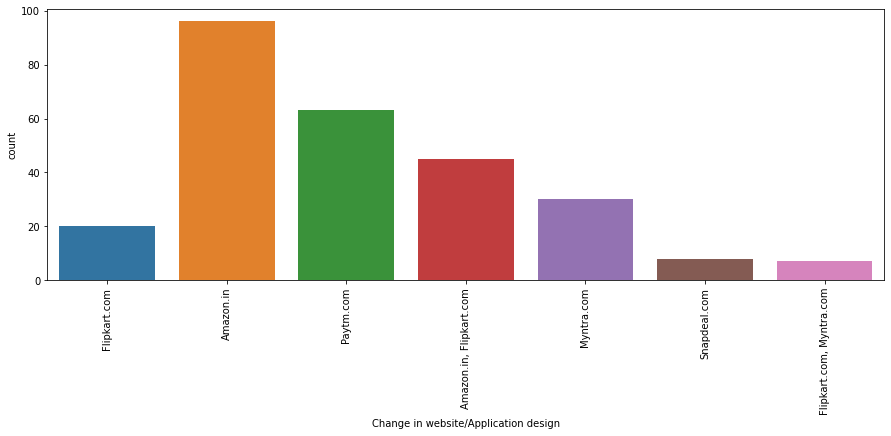




Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


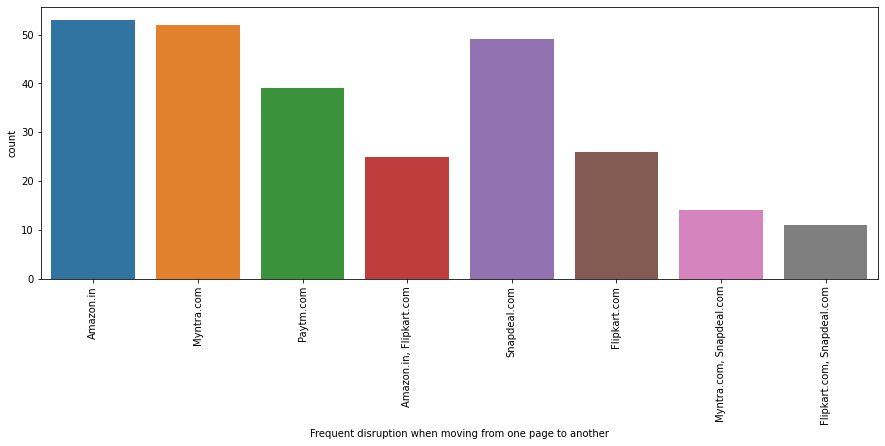




Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


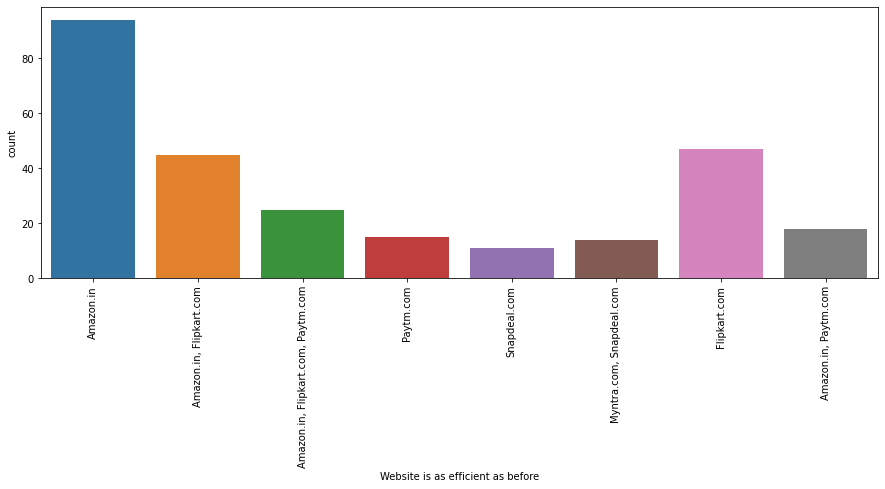




Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


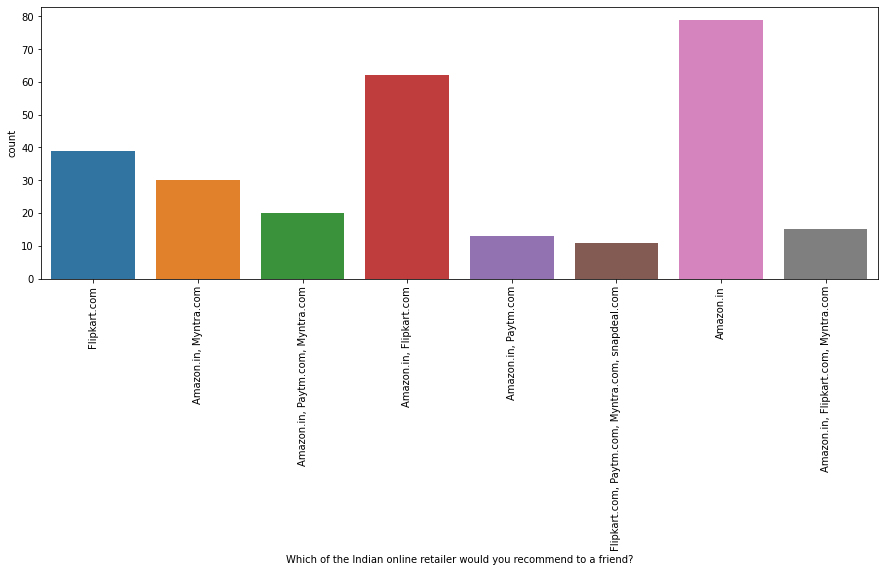

In [31]:
# Lets's visualize the e-commerce (company name) columns

for col in ecommerce_columns:
    print(df[col].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()
    print("\n\n")

### Observation:
1. Maximum people have shopped from these 5 companies - Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com.
2. Most people find Easy to use website or application are - Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com.  Amazon.com and Flipkart.com are the major choices.
3. In terms of Visual appealing web-page layout also, Amazon.com and Flipkart.com seem to take the lead.
4. Talking about Wide variety of product on offer: Amazon.com and Flipkart.com are the major choices.
5. Complete, relevant description information of products: Once again, maximum people have chosen to go with Amazon.com and Flipkart.com
6. Fast loading website speed of website and application: Amazon seems to take the lead in this category, although paytm and Flipkart are not far behind.
7. Reliability of the website or application: Amazon seems to take the lead in this category too, although Flipkart and paytm are not far behind.
8. Quickness to complete purchase: Amazon seems to take the lead in this category too, although Flipkart and paytm are not far behind.
9. Availability of several payment options: Here, Amazon and Flipkart, both are the favourites. Although a lot of people also tend to go towards Myntra
10. Speedy order delivery: Amazon seems to take the lead in this category too, followed by Flipkart.
11. Privacy of customers’ information: Amazon has a good reputation for maintaining privacy, followed by Flipkart
12. Security of customer financial information: Here other than Amazon and Flipkart, Paytm.com, Myntra.com, Snapdeal.com are also trusted by a lot of people. This shows that all compamnies pay special attention to security.
13. Perceived Trustworthiness: Amazon and Flipkart are winners here as well. Although Myntra.com and Snapdeal.com are also not far behind.
14. Presence of online assistance through multi-channel: Amazon.in, Flipkart.com, Myntra.com, Snapdeal
15. Longer time to get logged in (promotion, sales period): Amazon, paytm
16. Longer time in displaying graphics and photos (promotion, sales period): Amazon.in, Flipkart.com
17. Late declaration of price: Myntra, Paytm, Snapdeal. These companies should work on this area to improve.
18. Longer page loading time (promotion, sales period): Myntra and Paytm have bad feedback in this. Flipkart should also have a look into it, as it is at the 3rd place.
19. Limited mode of payment on most products (promotion, sales period): Snapdeal is the most voted answer for this.
20. Longer delivery period: Paytm and Snapdeal need to shorten their delivery time.
21. Change in website/Application design: Amazon.in
22. Frequent disruption when moving from one page to another: Amazon.in
23. Website is as efficient as before: Amazon.in
24. Which of the Indian online retailer would you recommend to a friend?: Amazon/Flipkart

# Conclusion on the basis of Visualization are:

### Company with higher customer satisfaction and retention:
1. Amazon.com
2. Flipkart.com

### Company with high risk of customer churn :
1. Snapdeal.com

# HYPOTHESIS TESTING

### First Hypothesis

H0 - There is no relation between gender of customer and e-retail company recommendation to a friend (independent of each other).

H1 - Gender and e-retail company recommendation to a friend are dependent on each other.

In [33]:
#Creating cross-table 
df_c_table=pd.crosstab(df['1Gender of respondent'],df['Which of the Indian online retailer would you recommend to a friend?'])
df_c_table

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
1Gender of respondent,,,,,,,,
Female,47,42,14,22,11,16,28,1
Male,32,20,1,8,2,4,11,10


In [34]:
#Observed values
Observed_Values = df_c_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[47 42 14 22 11 16 28  1]
 [32 20  1  8  2  4 11 10]]


In [36]:
# we will be doing chi square test for testing our hypothesis
val=stats.chi2_contingency(df_c_table)
val

(27.83363335285096,
 0.0002356893927723333,
 7,
 array([[53.15613383, 41.71747212, 10.0929368 , 20.18587361,  8.7472119 ,
         13.45724907, 26.24163569,  7.40148699],
        [25.84386617, 20.28252788,  4.9070632 ,  9.81412639,  4.2527881 ,
          6.54275093, 12.75836431,  3.59851301]]))

In [37]:
Expected_Values=val[3]
Expected_Values

array([[53.15613383, 41.71747212, 10.0929368 , 20.18587361,  8.7472119 ,
        13.45724907, 26.24163569,  7.40148699],
       [25.84386617, 20.28252788,  4.9070632 ,  9.81412639,  4.2527881 ,
         6.54275093, 12.75836431,  3.59851301]])

In [39]:
no_of_rows=len(df_c_table.iloc[0:2,0])
no_of_columns=len(df_c_table.iloc[0,0:8])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 7


In [41]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [42]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 2.1852257166231297


In [43]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 14.067140449340169


In [44]:
# calculating the p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.9488810780740886
Significance level:  0.05
Degree of Freedom:  7


### Observation
As p-value is greater than 0.05(significance level) therefore null hypothesis(H0) is accepted.

Hence, there is no relation between gender of customer and e-retail company recommendation to a friend.